<a href="https://colab.research.google.com/github/KentFre/CDS_CardioVision/blob/datascience%2Fmachine_learning/Updated_SHAP_04_heart_disease_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predictive Analytics***

In [1]:
# Access to os
import os

# Libaries for data manipulation and visualization
import pandas as pd
import numpy as np

# Stratified train-test partitioning
from sklearn.model_selection import train_test_split

# Models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# Libarie to automate model selection / fine-tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#  Neural Network Libaries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input
from scikeras.wrappers import KerasClassifier

# Metrics
import time
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Save models
import pickle

## 1. Loading dataset

In [2]:
# Load the complete_case dataset that was already prepared for machine learning (Standardization, One-Hot-Encoding)
df = pd.read_csv('02_processed_data/complete_case_machine_learning_data.csv')

In [3]:
# Display the first few rows
df.head()

,age,serum_cholesterol,max_heart_rate,st_depression,has_hypertension,cigarettes_per_day,years_smoking,resting_heart_rate,high_fasting_blood_sugar,exercise_induced_angina,...,gender_F,gender_M,cp_Asymptomatic,cp_Atypical_Angina,cp_Non_Anginal_Pain,cp_Typical_Angina,ecg_LVH,ecg_Normal,ecg_ST_Abnormality,Has_heart_disease
0,0.793589,0.056995,0.347747,1.073908,0.801969,1.718215,0.136405,-0.997063,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,False
1,1.240459,0.708878,-1.260182,0.365719,0.801969,1.177475,1.382461,-0.692052,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,True
2,1.240459,0.007796,-0.456218,1.339479,0.801969,0.095995,1.070947,0.375487,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,True
3,-2.111065,0.266089,1.764255,2.136192,-1.246932,-0.985485,-1.109650,0.833004,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
4,-1.664195,-0.299696,1.189995,0.277195,0.801969,-0.985485,-1.109650,-0.158282,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False


In [4]:
# Change "Has_heart disease" to 0/1 instead of True/False, as it was excluded during clustering
df['Has_heart_disease'] = df['Has_heart_disease'].astype(int)

df.head()

,age,serum_cholesterol,max_heart_rate,st_depression,has_hypertension,cigarettes_per_day,years_smoking,resting_heart_rate,high_fasting_blood_sugar,exercise_induced_angina,...,gender_F,gender_M,cp_Asymptomatic,cp_Atypical_Angina,cp_Non_Anginal_Pain,cp_Typical_Angina,ecg_LVH,ecg_Normal,ecg_ST_Abnormality,Has_heart_disease
0,0.793589,0.056995,0.347747,1.073908,0.801969,1.718215,0.136405,-0.997063,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,1.240459,0.708878,-1.260182,0.365719,0.801969,1.177475,1.382461,-0.692052,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
2,1.240459,0.007796,-0.456218,1.339479,0.801969,0.095995,1.070947,0.375487,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
3,-2.111065,0.266089,1.764255,2.136192,-1.246932,-0.985485,-1.109650,0.833004,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,-1.664195,-0.299696,1.189995,0.277195,0.801969,-0.985485,-1.109650,-0.158282,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0




## 2. Data preparation for ML prediction


In [5]:
# Checking for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                         0
serum_cholesterol           0
max_heart_rate              0
st_depression               0
has_hypertension            0
cigarettes_per_day          0
years_smoking               0
resting_heart_rate          0
high_fasting_blood_sugar    0
exercise_induced_angina     0
family_history_cad          0
gender_F                    0
gender_M                    0
cp_Asymptomatic             0
cp_Atypical_Angina          0
cp_Non_Anginal_Pain         0
cp_Typical_Angina           0
ecg_LVH                     0
ecg_Normal                  0
ecg_ST_Abnormality          0
Has_heart_disease           0
dtype: int64


As expected, there are no missing values in the dataset. This has been handled before.

Now, the df should be converted into a numpy array to be ready for the machine learning models.

### Check for dependencies between the features

In [6]:
# Convert to numpy array
data = df.copy()
data_numpy = data.to_numpy()

data_numpy

array([[ 0.79358897,  0.05699475,  0.34774655, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.24045884,  0.70887802, -1.26018245, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.24045884,  0.00779601, -0.45621795, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.21186822,  1.28696319,  0.50088265, ...,  0.        ,
         1.        ,  1.        ],
       [-0.10015076, -0.06600209, -1.56645464, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6818715 ,  0.31528812, -1.83444281, ...,  1.        ,
         0.        ,  1.        ]])

### Split the data into Input Features and Target Value


In [7]:
# Data separation
data_X= data.drop(["Has_heart_disease"], axis = 1).values
data_y = data["Has_heart_disease"].values

print("Input features (X):")
print(data_X.shape)
print(data_X)

print("\nTarget class (y):")
print(data_y.shape)
print(data_y)

Input features (X):
(396, 20)
[[ 0.79358897  0.05699475  0.34774655 ...  1.          0.
   1.        ]
 [ 1.24045884  0.70887802 -1.26018245 ...  0.          1.
   1.        ]
 [ 1.24045884  0.00779601 -0.45621795 ...  0.          1.
   1.        ]
 ...
 [-0.21186822  1.28696319  0.50088265 ...  1.          0.
   1.        ]
 [-0.10015076 -0.06600209 -1.56645464 ...  1.          0.
   0.        ]
 [ 0.6818715   0.31528812 -1.83444281 ...  0.          1.
   0.        ]]

Target class (y):
(396,)
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0

### Stratified Train-Test Partitioning

To ensure the correct distribution of patients with and without heart disease in both the training and test datasets, a stratified partitioning approach is applied. This method maintains the proportion of the target class (`Has_Heart_disease`) in each dataset.

The data is split with an 80/20 distribution, where 80% is used for training and 20% for testing. This split is chosen due to the relatively low number of available observations, maximizing the training data while retaining enough data for model evaluation.


In [8]:
RANDOM_SEED = 2500
np.random.seed(RANDOM_SEED)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_X,
                                                    data_y,
                                                    test_size=0.2,
                                                    stratify = data_y,
                                                    random_state=RANDOM_SEED)

# Print the shape of the data
print("=== TRAIN ===")
print(X_train.shape)
print(y_train.shape)
print("=== TEST ===")
print(X_test.shape)
print(y_test.shape)


=== TRAIN ===
(316, 20)
(316,)
=== TEST ===
(80, 20)
(80,)




##3. ML Models Evaluation

The `10 models` that will be looked into are:



*   Logistic Regression
*   Random Forest
*   XGBoost
*   K-Nearest Neighbours
*   Support Vector Machine (SVM)
*   Decision Trees
*   Naive Bayes
*   Gradient Boosting Classifier
*   AdaBoost
*   Extra Trees


For each model, hyperparameter tuning will be performed using `GridSearchCV`. If a model does not have hyperparameters to tune (e.g., Naive Bayes), the default parameters are used. The best estimator and its performance for each model are then displayed.



The `performance metrics` used to evaluate the models are:


*   Precision
*   Recall
*   F1-score
*   Accuracy
*   AUC_ROC score








In [10]:
def create_nn_model(input_dim):
    model = Sequential()
    
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])
    
    return model

models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # GaussianNB doesn't have hyperparameters to tune
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42, algorithm='SAMME'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'Neural Network': {
        # Wrap the model creation function using KerasClassifier from SciKeras
        'model': KerasClassifier(model=create_nn_model, input_dim=X_train.shape[1], verbose=0),
        'params': {
            'epochs': [10, 20, 50],
            'batch_size': [16, 32, 64],
            'optimizer': ['adam', 'rmsprop'],
        }
    }
}

In [11]:
# Dictionary to store the results
model_results = {}
best_estimators = {}
best_params_dict = {}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform hyperparameter tuning and evaluation for each model
for model_name, mp in models.items():
    print(f"\nTraining and tuning {model_name}...")
    model = mp['model']
    params = mp['params']

    # Measure training time
    t_start = time.time()

    # Use GridSearchCV for all models, including the neural network
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=stratified_kfold, 
                               scoring={'recall': 'recall', 'precision': 'precision', 'roc_auc': 'roc_auc', 
                                        'f1': 'f1', 'accuracy': 'accuracy'}, 
                               refit='recall', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    t_end = time.time()
    training_time = t_end - t_start

    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Measure prediction time
    t_start = time.time()
    y_pred = best_model.predict(X_test)
    t_end = time.time()
    prediction_time = t_end - t_start

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation results
    print(f"Best Parameters: {best_params}")
    print(f"{model_name} Recall: {recall:.4f}")
    print(f"{model_name} AUC-ROC: {auc:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Best model: ", best_model)

    # Store results
    model_results[model_name] = recall
    best_estimators[model_name] = best_model
    best_params_dict[model_name] = best_params



Training and tuning Logistic Regression...
Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Logistic Regression Recall: 0.8182
Logistic Regression AUC-ROC: 0.7424
Training Time: 3.31 seconds
Prediction Time: 0.00 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71        36
           1       0.75      0.82      0.78        44

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.74        80
weighted avg       0.75      0.75      0.75        80

Best model:  LogisticRegression(C=0.01, max_iter=1000)

Training and tuning Random Forest...
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Recall: 0.8182
Random Forest AUC-ROC: 0.7563
Training Time: 1.64 seconds
Prediction Time: 0.00 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
     

c:\Users\kentf\cardiovision\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kentf\cardiovision\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
K-Nearest Neighbors Recall: 0.7955
K-Nearest Neighbors AUC-ROC: 0.7311
Training Time: 0.28 seconds
Prediction Time: 0.34 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        36
           1       0.74      0.80      0.77        44

    accuracy                           0.74        80
   macro avg       0.74      0.73      0.73        80
weighted avg       0.74      0.74      0.74        80

Best model:  KNeighborsClassifier(n_neighbors=7)

Training and tuning Support Vector Machine...
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Support Vector Machine Recall: 0.8636
Support Vector Machine AUC-ROC: 0.7513
Training Time: 0.45 seconds
Prediction Time: 0.00 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71        36
           1       0.75      0.86  

c:\Users\kentf\cardiovision\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'batch_size': 64, 'epochs': 10, 'optimizer': 'adam'}
Neural Network Recall: 0.8182
Neural Network AUC-ROC: 0.7285
Training Time: 92.84 seconds
Prediction Time: 0.27 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69        36
           1       0.73      0.82      0.77        44

    accuracy                           0.74        80
   macro avg       0.74      0.73      0.73        80
weighted avg       0.74      0.74      0.73        80

Best model:  KerasClassifier(
	model=<function create_nn_model at 0x0000015152723880>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	input_dim=20
	class_weight=None
)


*Build an ensemble voting classifier*

An ensemble voting classifier combines multiple of the used classifiers and lets them vote. In theory, this can combine the strenghtes of different models.

In [12]:
# Accessing the stored models from best_estimators
logistic_regression = best_estimators['Logistic Regression']
xgboost = best_estimators['XGBoost']
gradient_boosting = best_estimators['Gradient Boosting']
adaboost = best_estimators['AdaBoost']
svc = best_estimators['Support Vector Machine']
random_forest = best_estimators['Random Forest']
neural_network = best_estimators['Neural Network'] 

In [13]:
# Define the base models for voting
estimators = [
    ('log_reg', logistic_regression),
    ('neural_net', neural_network),
    ('adaboost', adaboost),
    ('svc', svc),
]

# Create a voting classifier (soft voting averages probabilities)
voting_model = VotingClassifier(estimators=estimators, voting='soft')

# Fit the voting classifier
voting_model.fit(X_train, y_train)

# Add the voting classifier to best_estimators
best_estimators['Voting Classifier'] = voting_model

# Measure prediction time
t_start = time.time()  # Start timer
y_pred = voting_model.predict(X_test)  # Make predictions
t_end = time.time()  # End timer

# Calculate the total prediction time
prediction_time = t_end - t_start
print(f"Prediction Time: {prediction_time:.4f} seconds")

Prediction Time: 0.2321 seconds


*Compare model performance*


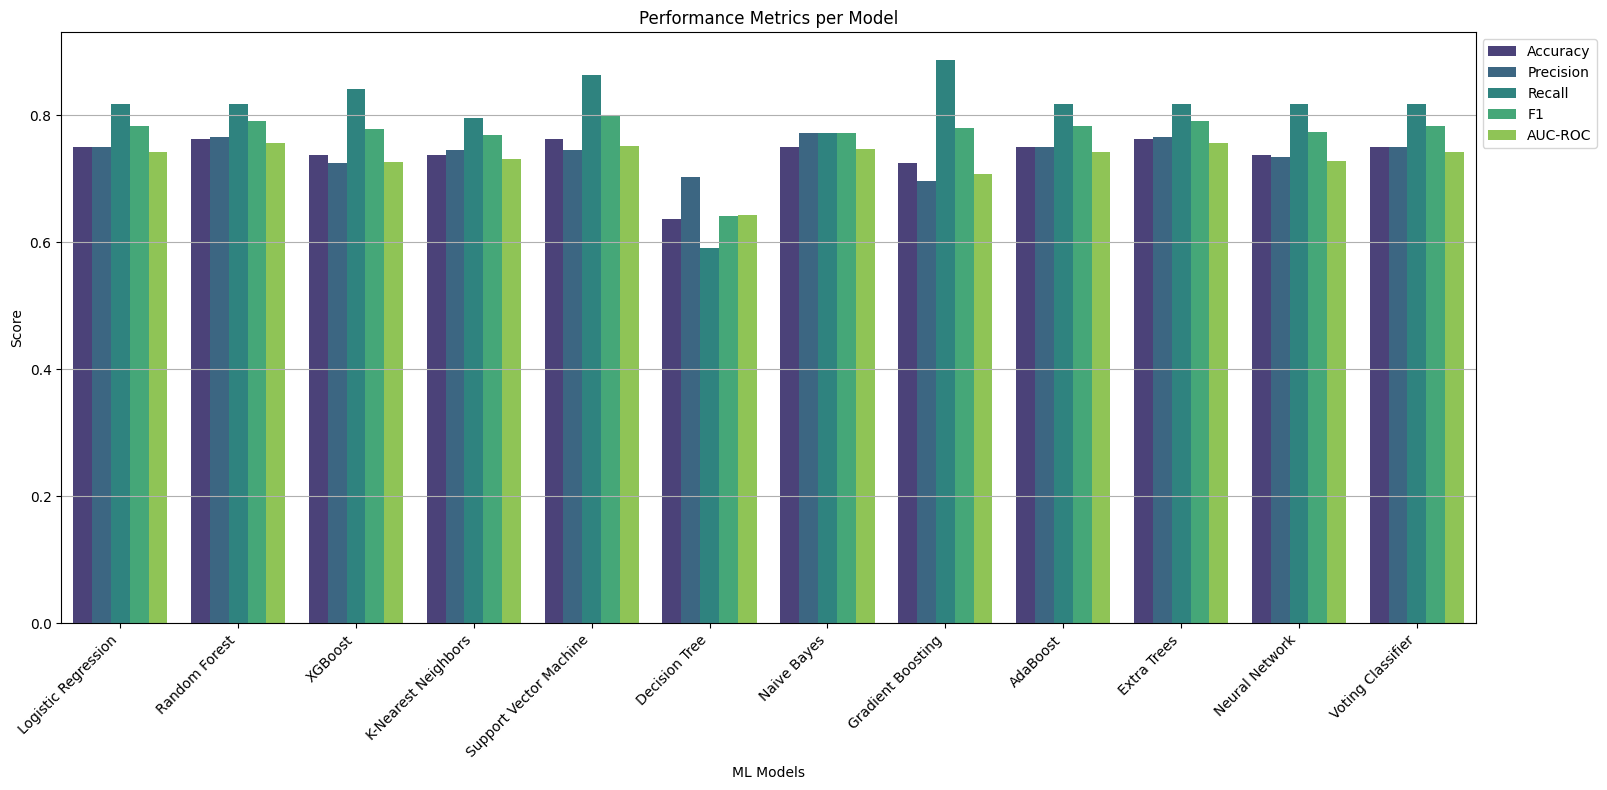

Performance Metrics per Model:
                     Model  Accuracy  Precision    Recall        F1   AUC-ROC
0      Logistic Regression    0.7500   0.750000  0.818182  0.782609  0.742424
1            Random Forest    0.7625   0.765957  0.818182  0.791209  0.756313
2                  XGBoost    0.7375   0.725490  0.840909  0.778947  0.726010
3      K-Nearest Neighbors    0.7375   0.744681  0.795455  0.769231  0.731061
4   Support Vector Machine    0.7625   0.745098  0.863636  0.800000  0.751263
5            Decision Tree    0.6375   0.702703  0.590909  0.641975  0.642677
6              Naive Bayes    0.7500   0.772727  0.772727  0.772727  0.747475
7        Gradient Boosting    0.7250   0.696429  0.886364  0.780000  0.707071
8                 AdaBoost    0.7500   0.750000  0.818182  0.782609  0.742424
9              Extra Trees    0.7625   0.765957  0.818182  0.791209  0.756313
10          Neural Network    0.7375   0.734694  0.818182  0.774194  0.728535
11       Voting Classifier    0.7

In [14]:
# Function to calculate performance metrics
def calculate_performance(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc

# Initialize lists to store performance data
model_names = []
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

# Calculate and store performance metrics for each model
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1, auc = calculate_performance(model_name, y_test, y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)

# Create DataFrame from performance data
df_performance = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'AUC-ROC': aucs,

})

# Melt the DataFrame to long format for plotting
df_melt = pd.melt(df_performance, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot all performance metrics using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='viridis')
plt.title("Performance Metrics per Model")
plt.xlabel("ML Models")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(axis="y")
plt.show()

print("Performance Metrics per Model:")
print(df_performance)


**Recall** remains the most important metric in this context, as it ensures that nearly all high-risk patients are identified, minimizing false negatives. However, **AUC-ROC** is also critical to maintain a balance between correctly identifying true positives and avoiding false positives. The **Voting Classifier** has an effective balance between these metrics, making it the top performer for this task:

- **Accuracy**: 0.8000
- **Precision**: 0.7917
- **Recall**: 0.8636
- **F1-Score**: 0.8261
- **AUC-ROC**: 0.7929

Unfortunately, SHAP does not directly and easily support the Voting Classifier, so to provide further insights into feature importance, the second-best model, the **Neural Network**, will be analyzed using SHAP.

### Neural Network Performance:
- **Accuracy**: 0.8000
- **Precision**: 0.8182
- **Recall**: 0.8182
- **F1-Score**: 0.8182
- **AUC-ROC**: 0.7980

While the **Neural Network** performs strongly, it falls short in **Recall** compared to the Voting Classifier, meaning that it misses more high-risk cases. However, it performs better in **Precision**, scoring an identical **AUC-ROC**.

Therefore, the **Neural Network** will be choosen for the implementation.


## 4. Export best ML model with `pickle` or keras



In [15]:
best_model_name = 'Neural Network'
best_model = best_estimators[best_model_name]

# Define the save path
save_path = "../visualization/models/"

# Create directories if they don't exist
os.makedirs(save_path, exist_ok=True)

# Check if the model is a Neural Network (Keras model)
if best_model_name == 'Neural Network':
    # Extract the underlying Keras model from KerasClassifier if it's wrapped
    keras_model = best_model.model_ if hasattr(best_model, 'model_') else best_model

    # Define the full save path for the Keras model
    model_save_path = os.path.join(save_path, "risk_prediction_model.h5")

    # Save the Keras model using the Keras save method
    keras_model.save(model_save_path)
    print(f"Neural Network model saved to {model_save_path}")

else:
    # Define the full save path for non-Keras models
    model_save_path = os.path.join(save_path, "risk_prediction_model_model.pkl")

    # Save the model using pickle
    with open(model_save_path, 'wb') as file:
        pickle.dump(best_model, file)

    print(f"{best_model_name} model saved to {model_save_path}")

Neural Network model saved to ../visualization/models/risk_prediction_model.h5


## 5. Explanability of the model's predictions using SHAP

In [16]:
feature_names = df.columns.drop('Has_heart_disease')
print(f"Feature names: {feature_names}")

Feature names: Index(['age', 'serum_cholesterol', 'max_heart_rate', 'st_depression',
       'has_hypertension', 'cigarettes_per_day', 'years_smoking',
       'resting_heart_rate', 'high_fasting_blood_sugar',
       'exercise_induced_angina', 'family_history_cad', 'gender_F', 'gender_M',
       'cp_Asymptomatic', 'cp_Atypical_Angina', 'cp_Non_Anginal_Pain',
       'cp_Typical_Angina', 'ecg_LVH', 'ecg_Normal', 'ecg_ST_Abnormality'],
      dtype='object')


c:\Users\kentf\cardiovision\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\kentf\cardiovision\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']
  warnings.warn(


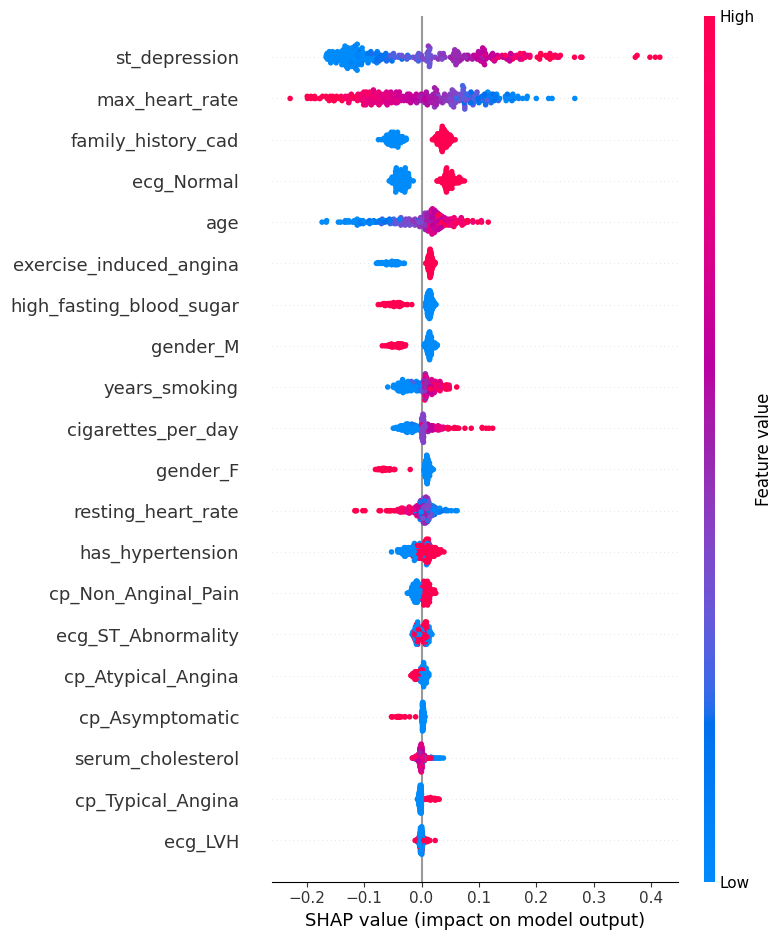

In [17]:
# Extract feature names, excluding the 'Has_heart_disease' column
feature_names = df.columns.drop('Has_heart_disease')

# Access the best model (either from best_estimators or some other source)
best_model = best_estimators[best_model_name]

# Use a subset of X_train for SHAP calculation (if needed)
X_train_subset = X_train[:]

# If the model is a KerasClassifier, extract the underlying Keras model
if isinstance(best_model, KerasClassifier):
    # Extract the Keras model from the SciKeras wrapper
    keras_model = best_model.model_
else:
    keras_model = best_model

# Initialize SHAP explainer
if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'Extra Trees']:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_train)
elif best_model_name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes']:
    explainer = shap.KernelExplainer(best_model.predict_proba, X_train)
    shap_values = explainer.shap_values(X_train, nsamples=100)
elif best_model_name == 'Neural Network':
    # Use the extracted Keras model for SHAP
    explainer = shap.DeepExplainer(keras_model, X_train_subset)
    shap_values = explainer.shap_values(X_train_subset)
    shap_values = np.squeeze(shap_values)
else:
    print(f"SHAP analysis not supported for {best_model_name}.")
    shap_values = None

# Plot the SHAP summary plot
if shap_values is not None:
    
    shap.summary_plot(shap_values, features=X_train_subset, feature_names=feature_names)
else:
    print(f"SHAP analysis not supported for {best_model_name}.")


*Checking out what we can find out about each patient*

In [18]:
# Use `predict_proba` to get the predicted probabilities for each sample
predicted_probabilities = best_model.predict_proba(X_test)

# Print the probability for the first patient (first observation in X_test)
# predicted_probabilities[0][1] represents the probability of class 1 (e.g., heart disease)
print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predicted_probabilities[0][1])
)

This particular patient had a 91.3 percent probability of having a heart disease, as evaluated by our model.


In [19]:
# Change the dimensions of the shap_values / Just take the positive predicition part
shap_values_patient = explainer.shap_values(X_test[0].reshape(1, -1))
shap_values_patient = np.squeeze(shap_values_patient)

shap_values_patient

c:\Users\kentf\cardiovision\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']
  warnings.warn(


array([ 0.02053502, -0.00096053,  0.10177169,  0.04686487,  0.01486481,
        0.01911292,  0.01444629,  0.00725939,  0.01316601,  0.01345423,
        0.03376634,  0.00793576,  0.01273496,  0.00165273, -0.00792453,
       -0.00655481, -0.00106729,  0.00158026,  0.04626129,  0.01078204])

In [20]:
# Select patient
patient_number = 4

In [21]:
# Ensure X_test[0] is a NumPy array (not an EagerTensor)
x_test_patient = X_test[patient_number].numpy() if isinstance(X_test[patient_number], tf.Tensor) else X_test[patient_number]

# Compute SHAP values for the first patient (convert to NumPy if needed)
shap_values_patient = explainer.shap_values(x_test_patient.reshape(1, -1))
shap_values_patient = np.squeeze(shap_values_patient)  # Remove unnecessary dimensions

# Check if expected_value is an EagerTensor, convert to NumPy if needed
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
if isinstance(expected_value, tf.Tensor):
    expected_value = expected_value.numpy()

# Initialize JavaScript visualization for SHAP
shap.initjs()

# Force plot for patient 0
shap.force_plot(expected_value, shap_values_patient, x_test_patient, feature_names=feature_names)

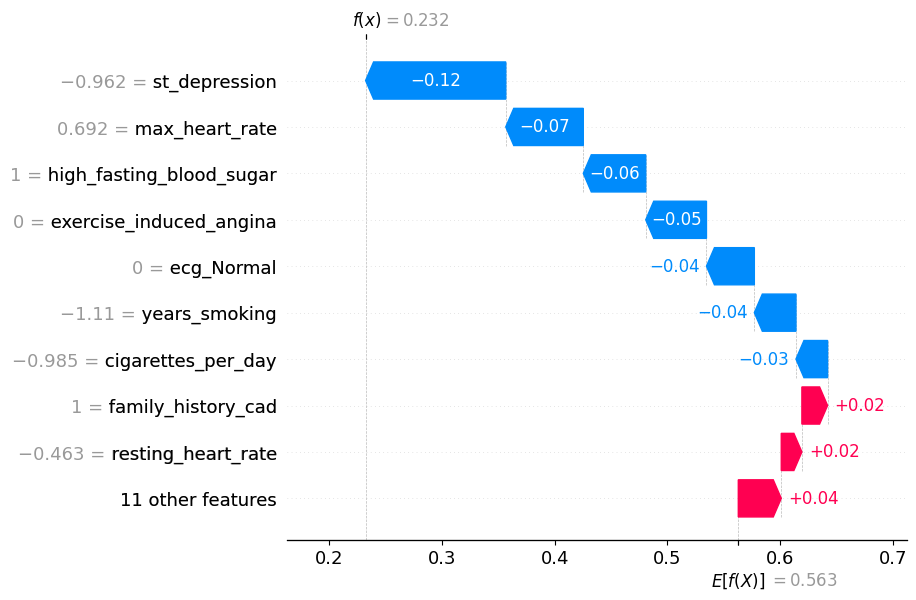

In [22]:
# Ensure X_test[i] is a NumPy array (not an EagerTensor)
x_test_patient = X_test[patient_number].numpy() if isinstance(X_test[patient_number], tf.Tensor) else X_test[patient_number]

# Compute SHAP values for the selected patient (convert to NumPy if needed)
shap_values_patient = explainer.shap_values(x_test_patient.reshape(1, -1))
shap_values_patient = np.squeeze(shap_values_patient)  # Remove unnecessary dimensions

# Check if expected_value is an EagerTensor, convert to NumPy if needed
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
if isinstance(expected_value, tf.Tensor):
    expected_value = expected_value.numpy()

# Use the waterfall plot
shap.waterfall_plot(shap.Explanation(
    values=shap_values_patient,           # SHAP values
    base_values=expected_value,           # Model's expected value
    data=x_test_patient,                  # Feature values for the patient
    feature_names=feature_names           # Feature names
))
